In [383]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.5f' % x)

### Read companies data

In [384]:
companies = pd.read_csv("companies.csv", encoding = "ISO-8859-1", engine='python')

### Check if permalink has null values before getting unique values

In [385]:
companies.isnull().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

## Get Unique values from companies data

In [386]:
print(len(companies['permalink'].unique()))

66368


### Read rounds2 file

In [387]:
rounds2 = pd.read_csv("rounds2.csv", encoding = "ISO-8859-1", engine='python')

### check if 'company_permalink' has null values before getting unique values

In [388]:
rounds2['company_permalink'].isnull().sum()

0

## Unique values of 'company_permalink' of rounds2 values

In [389]:
len(rounds2['company_permalink'].unique())

90247

### set companies -> "permalink" upper to map with rounds2 -> "company_permalink" 

In [390]:
companies["permalink"] = companies["permalink"].apply(lambda x: x.strip().upper()) 

### set rounds2 -> "company_permalink" upper to map with companies -> "permalink"

In [391]:
rounds2["company_permalink"] = rounds2["company_permalink"].apply(lambda x: x.strip().upper()) 

### Mapping rounds2 with companies return records with junk characters.

In [392]:
rounds2.loc[~rounds2['company_permalink'].isin(companies['permalink']),:]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
29597,/ORGANIZATION/E-CÃBICA,/funding-round/8491f74869e4fe8ba9c378394f8fbdea,seed,NaN,01-02-2015,nan
31863,/ORGANIZATION/ENERGYSTONE-GAMES-ÇΜÇ³Æ¸¸Æ,/funding-round/b89553f3d2279c5683ae93f45a21cfe0,seed,NaN,09-08-2014,nan
45176,/ORGANIZATION/HUIZUCHE-COM-Æ Ç§ŸÈ½¦,/funding-round/8f8a32dbeeb0f831a78702f83af78a36,seed,NaN,18-09-2014,nan
58473,/ORGANIZATION/MAGNET-TECH-Ç£Ç³Ç§Æ,/funding-round/8fc91fbb32bc95e97f151dd0cb4166bf,seed,NaN,16-08-2014,1625585.00000
101036,/ORGANIZATION/TIPCAT-INTERACTIVE-Æ²ÈŸÄ¿¡Æ¯Ç...,/funding-round/41005928a1439cb2d706a43cb661f60f,seed,NaN,06-09-2010,nan
109969,/ORGANIZATION/WEICHE-TECH-ÅÈ½¦Ç§Æ,/funding-round/f74e457f838b81fa0b29649740f186d8,venture,A,06-09-2015,nan
113839,/ORGANIZATION/ZENGAME-Ç¦ Æ¸¸Ç§Æ,/funding-round/6ba28fb4f3eadf5a9c6c81bc5dde6cdf,seed,NaN,17-07-2010,nan


### remove junk characters in rounds2 table 'company_permalink' column

In [393]:
rounds2['company_permalink'] = rounds2['company_permalink'].str.encode('utf-8').str.decode('ascii','ignore')

### remove junk characters in companies table 'permalink' column

In [394]:
companies['permalink'] = companies['permalink'].str.encode('utf-8').str.decode('ascii','ignore')

## All th companies present in rounds2 table are in companies table

In [395]:
rounds2.loc[~rounds2['company_permalink'].isin(companies['permalink']),:]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd


### set 'permalink' as index in companies table

In [396]:
companies.set_index('permalink')

,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
permalink,,,,,,,,,
/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,4/9/2014
/ORGANIZATION/-THE-ONE-OF-THEM-INC-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
/ORGANIZATION/0-6-COM,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,1/1/2007
/ORGANIZATION/004-TECHNOLOGIES,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,1/1/2010
...,...,...,...,...,...,...,...,...,...
/ORGANIZATION/ZZNODE-SCIENCE-AND-TECHNOLOGY-CO-LTD,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN
/ORGANIZATION/ZZZZAPP-COM,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
/ORGANIZATION/ERON,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,1/1/2011


### rename 'company_permalink' to 'permalink' in rounds table

In [397]:
rounds2 = rounds2.rename(columns = {'company_permalink': 'permalink'})

### set 'permalink' as index in rounds2 table

In [398]:
rounds2.set_index('permalink')

,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
permalink,,,,,
/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00000
/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan
/ORGANIZATION/-QOUNTER,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.00000
/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.00000
/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00000
...,...,...,...,...,...
/ORGANIZATION/ZZZZAPP-COM,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.00000
/ORGANIZATION/ZZZZAPP-COM,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.00000
/ORGANIZATION/ERON,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,nan


## Merge rounds2 table with companies and calculate the length of rows in the merged table

In [399]:
master_frame = pd.merge(rounds2,companies)
len(master_frame)

114949

### Check if any column which is needed for analysis are null  

In [400]:
master_frame.isnull().sum()

permalink                      0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
dtype: int64

In [401]:
(master_frame['raised_amount_usd'].isnull().sum() * 100) / (master_frame.shape[0]) 

17.390320924931927

### Remove all rows with 'raised_amount_usd' null column as 17% of rows are null

In [402]:
master_frame = master_frame[~((master_frame['raised_amount_usd'].isnull()))] 

### Get all records of venturetype from Master frame

In [403]:
venture_plot = master_frame[master_frame['funding_round_type']=='venture']

### Box plot of veture type shows presence of outliers outliers

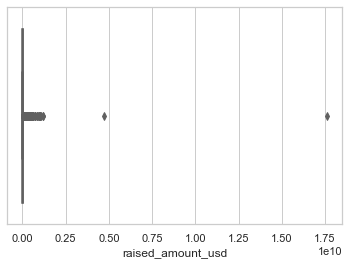

In [404]:
sns.set_theme(style="whitegrid")
sns.boxplot(x=venture_plot["raised_amount_usd"], palette="Blues")
plt.show()

C:\Users\PADMP\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='raised_amount_usd', ylabel='Density'>

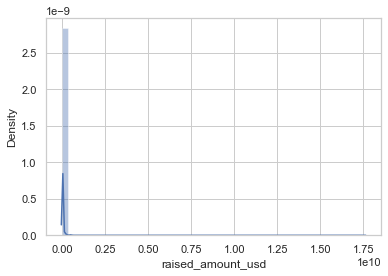

In [405]:
sns.distplot(venture_plot['raised_amount_usd']) 

In [406]:
venture_plot['raised_amount_usd'].sort_values(ascending=False).head(40)

37569    17600000000.00000
60207     4700000000.00000
104173    1200000000.00000
104166    1200000000.00000
112173    1100000000.00000
36401     1000000000.00000
104169    1000000000.00000
104176    1000000000.00000
91675     1000000000.00000
93043     1000000000.00000
42085      950000000.00000
114155     931300000.00000
92043      915000000.00000
27492      850000000.00000
51756      849803496.00000
26904      750000000.00000
21045      740000000.00000
61419      739000000.00000
27551      700000000.00000
60684      700000000.00000
36406      700000000.00000
30940      630000000.00000
48688      617000000.00000
110793     600000000.00000
104175     600000000.00000
53951      600000000.00000
27552      600000000.00000
23591      573000000.00000
26861      568000000.00000
98820      550000000.00000
58414      542000000.00000
58029      530000000.00000
93960      526000000.00000
100384     500000000.00000
67740      500000000.00000
5839       500000000.00000
111083     500000000.00000
1

### Get median values of venturplot for Represnetative funding amount as there are outliers 

In [407]:
venture_plot['raised_amount_usd'].median()

5000000.0

### Plotting of angel plot type records shows presence of outliers. Hence median is selected as reprentative funding type

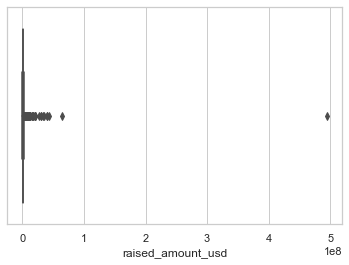

C:\Users\PADMP\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


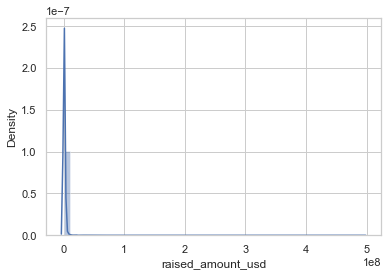

51450    494511992.00000
955       63590263.00000
32        43923865.00000
109151    40000000.00000
87139     40000000.00000
88532     35000000.00000
52024     34000000.00000
72760     30000000.00000
948       30000000.00000
24717     27000000.00000
55688     20708316.00000
2656      20000000.00000
50799     20000000.00000
112166    20000000.00000
76979     20000000.00000
107465    20000000.00000
70367     18000000.00000
42924     16837481.00000
100570    15424165.00000
86026     15000000.00000
113769    13000000.00000
11426     12804097.00000
13341     12500000.00000
55176     12000000.00000
56030     11713030.00000
84502     10000000.00000
86940     10000000.00000
13045     10000000.00000
87882     10000000.00000
67468     10000000.00000
62664     10000000.00000
11108     10000000.00000
11099     10000000.00000
28594     10000000.00000
45186      9000000.00000
44749      9000000.00000
52810      8967644.00000
16212      8888247.00000
55808      8500000.00000
60149      8000000.00000


In [408]:
angel_plot = master_frame[master_frame['funding_round_type']=='angel']
sns.boxplot(x=angel_plot["raised_amount_usd"])
plt.show()
sns.distplot(angel_plot['raised_amount_usd'])
plt.show()
print(angel_plot['raised_amount_usd'].sort_values(ascending=False).head(40))
print(angel_plot.median())

### Plotting of seed plot type records shows presence of outliers. Hence median is selected as reprentative funding type

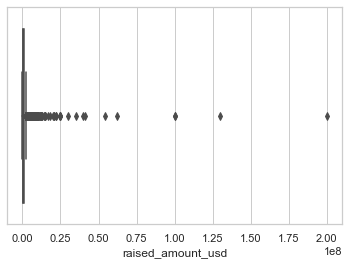

C:\Users\PADMP\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


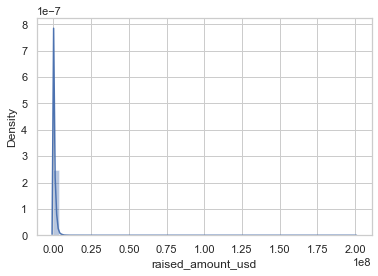

13465    200000000.00000
31960    130000000.00000
93042    100000000.00000
19720    100000000.00000
110721    62000000.00000
24967     54000000.00000
22089     41000000.00000
71892     40000000.00000
100296    35000000.00000
71893     30000000.00000
74849     25000000.00000
90163     25000000.00000
99676     25000000.00000
58532     24833177.00000
44004     22300000.00000
104750    22000000.00000
13230     21000000.00000
110293    21000000.00000
63676     20000000.00000
72624     18000000.00000
105703    16535302.00000
87202     15027818.00000
96240     15000000.00000
19409     15000000.00000
67469     15000000.00000
9833      14081347.00000
74473     13000000.00000
43198     12600000.00000
75688     12500000.00000
107883    12000000.00000
70346     12000000.00000
89684     11500000.00000
90387     11500000.00000
52402     11000000.00000
55261     10042807.00000
82110     10000000.00000
45745     10000000.00000
1848      10000000.00000
40348     10000000.00000
66711     10000000.00000


In [409]:
seed_plot = master_frame[master_frame['funding_round_type']=='seed']
sns.boxplot(x=seed_plot["raised_amount_usd"])
plt.show()
sns.distplot(seed_plot['raised_amount_usd'])
plt.show()
print(seed_plot['raised_amount_usd'].sort_values(ascending=False).head(40))
print(seed_plot.median())

### Plotting of 'private_equity' plot type records shows presence of outliers. Hence median is selected as reprentative funding type

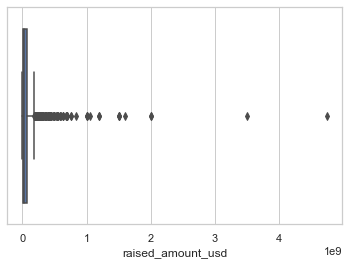

C:\Users\PADMP\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


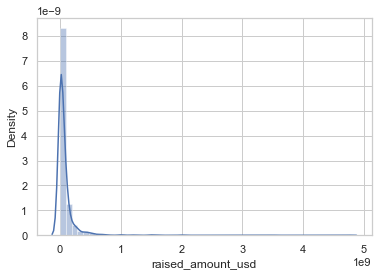

75532    4745460219.00000
35771    3500000000.00000
27550    2000000000.00000
4368     2000000000.00000
4369     1600000000.00000
34407    1500000000.00000
3767     1500000000.00000
106179   1498515340.00000
9488     1200000000.00000
104168   1200000000.00000
109379   1050000000.00000
23942    1000000000.00000
27555    1000000000.00000
4366     1000000000.00000
6332      833000000.00000
63213     750000000.00000
94358     750000000.00000
36405     700000000.00000
113027    700000000.00000
49278     692000000.00000
86755     681759114.00000
10758     674598700.00000
43697     630000000.00000
91402     627000000.00000
31778     625000000.00000
82182     600000000.00000
60690     590000000.00000
90002     586000000.00000
1205      550000000.00000
70434     550000000.00000
38353     541000000.00000
58145     540000000.00000
45243     532000000.00000
42765     526666000.00000
10825     500000000.00000
59473     500000000.00000
80735     500000000.00000
73859     500000000.00000
73375     50

In [410]:
seed_plot = master_frame[master_frame['funding_round_type']=='private_equity']
sns.boxplot(x=seed_plot["raised_amount_usd"])
plt.show()
sns.distplot(seed_plot['raised_amount_usd'])
plt.show()
print(seed_plot['raised_amount_usd'].sort_values(ascending=False).head(40))
print(seed_plot.median()) 

### Filter records between 5 to 15 million

In [411]:
master_frame_filtered = master_frame[(master_frame['raised_amount_usd'] > 5000000) & (master_frame['raised_amount_usd'] < 15000000)].sort_values(by='raised_amount_usd', ascending=False)

### Check if 'funding_round_type' is empty

In [412]:
master_frame_filtered.isnull().sum()

permalink                     0
funding_round_permalink       0
funding_round_type            0
funding_round_code         5958
funded_at                     0
raised_amount_usd             0
name                          0
homepage_url                812
category_list               184
status                        0
country_code                671
state_code                  893
region                      847
city                        845
founded_at                 2827
dtype: int64

### Filter records with  'angel','private_equity','seed','venture'

In [413]:
master_frame_filtered = master_frame_filtered[master_frame_filtered['funding_round_type'].isin(['angel','private_equity','seed','venture'])]

### Groupby funding_round_type and get top Value and its type 

In [414]:
master_frame_filtered.groupby('funding_round_type').count()['permalink'].sort_values(ascending=False).head(1)

funding_round_type
venture    13799
Name: permalink, dtype: int64

In [415]:
master_frame = master_frame_filtered

### Webscrap english speaking countries

In [416]:
URL = "https://en.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language"
tables = pd.read_html(URL)

### Fill all english speaking countries in english_speaking_countries

In [417]:
english_speaking_countries = tables[1]['Alpha-3 code'].append(tables[0]['Alpha-3 code'])

In [418]:
master_frame

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
113931,/ORGANIZATION/ZENVERGE,/funding-round/f6f427e7f16677297e285205fafd351d,venture,B,31-10-2007,14999999.00000,Zenverge,http://www.zenverge.com,Semiconductors,acquired,USA,CA,SF Bay Area,Cupertino,1/1/2005
57840,/ORGANIZATION/LUMINAL,/funding-round/5e6ecf78c82785c1dc6dd9ba8d76a9d9,venture,NaN,31-07-2015,14999999.00000,Luminal,http://www.luminal.io,Cloud Computing|Infrastructure|Security|Software,operating,USA,MD,Hagerstown,Frederick,1/1/2012
49127,/ORGANIZATION/INTERMOLECULAR,/funding-round/d1df05942624a86ffad2cc3fd6e11ea5,venture,NaN,10-03-2011,14999999.00000,Intermolecular,http://www.intermolecular.com,Semiconductors,ipo,USA,CA,SF Bay Area,San Jose,1/1/2004
97052,/ORGANIZATION/SYNOS-TECHNOLOGY,/funding-round/ef5cac3f4889391e88670a63fc795d48,private_equity,NaN,08-06-2012,14999999.00000,Synos Technology,http://synos.com,Manufacturing,acquired,USA,CA,SF Bay Area,Fremont,1/1/2008
93483,/ORGANIZATION/SPIDERCLOUD-WIRELESS,/funding-round/f075bcbb79bf46485b861e01aaad62d8,venture,NaN,06-01-2015,14999999.00000,SpiderCloud Wireless,http://www.spidercloud.com,Enterprise Software,operating,USA,CA,SF Bay Area,San Jose,1/1/2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97941,/ORGANIZATION/TARANA-WIRELESS,/funding-round/c182804af960d8b6fb92f6300ff281fc,venture,NaN,19-07-2012,5000001.00000,Tarana Wireless,http://www.taranawireless.com,Mobile|Wireless,operating,USA,CA,SF Bay Area,Santa Clara,1/1/2009
53499,/ORGANIZATION/KNOWLEDGE-FACTOR,/funding-round/e54b5e5b9adf4817312b14ba2b18913d,venture,NaN,18-06-2012,5000001.00000,Knowledge Factor,http://knowledgefactor.com,Software,operating,USA,CO,Denver,Boulder,1/1/2000
97992,/ORGANIZATION/TARIS-BIOMEDICAL,/funding-round/571aefc45cc860b5218ef6906ac1283a,venture,NaN,04-12-2009,5000001.00000,TARIS Biomedical,http://www.tarisbiomedical.com,Biotechnology,operating,USA,MA,Boston,Lexington,1/1/2008
88168,/ORGANIZATION/SETPOINT-MEDICAL,/funding-round/24240fbe6ccd5c1ab36fe7e5b39f43e6,venture,NaN,19-10-2010,5000001.00000,SetPoint Medical,http://www.setpointmedical.com,Biotechnology,operating,USA,CA,Los Angeles,Valencia,1/1/2006


### Filter all records of Master frame with only Enlish speaking countries

In [419]:
master_frame = master_frame[master_frame['country_code'].isin(english_speaking_countries)] 

### Anlyze for null values in master_frame

In [420]:
master_frame.isnull().sum()

permalink                     0
funding_round_permalink       0
funding_round_type            0
funding_round_code         3905
funded_at                     0
raised_amount_usd             0
name                          0
homepage_url                571
category_list                83
status                        0
country_code                  0
state_code                   92
region                       53
city                         51
founded_at                 1763
dtype: int64

### Remove all records of master_frame which has country code null values

In [421]:
master_frame = master_frame[~((master_frame['country_code'].isnull()))] 

### Get top3 english speaking countries

In [422]:
master_frame.groupby('country_code').count().sort_values(ascending=False, by='raised_amount_usd')['raised_amount_usd']

country_code
USA    10436
GBR      596
CAN      390
IND      253
SGP       62
AUS       60
IRL       57
NZL       15
NGA        8
ZAF        6
PAK        4
KEN        3
PHL        2
MLT        1
Name: raised_amount_usd, dtype: int64

### Get top 9 country codes

In [423]:
Top_9 = list(master_frame.groupby('country_code').sum('raised_amount_usd').sort_values(ascending=False, by='raised_amount_usd')[:9].index)


### Filter Masterframe with Top 9 countries

In [424]:
master_frame = master_frame[master_frame['country_code'].isin(Top_9)] 

### Read mapping file

In [425]:
mapping = pd.read_csv("mapping.csv")

### Map categories to sector

In [426]:
mapping_sector = pd.melt(mapping, id_vars=['category_list'], value_vars=['Automotive & Sports', 'Blanks',
       'Cleantech / Semiconductors', 'Entertainment', 'Health',
       'Manufacturing', 'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising']) 
mapping_sector = mapping_sector[mapping_sector['value']==1] 

### Remove null values in mapping_sector

In [427]:
mapping_sector.isnull().sum()
mapping_sector = mapping_sector[~mapping_sector['category_list'].isnull()]

In [428]:
master_frame.isnull().sum()

permalink                     0
funding_round_permalink       0
funding_round_type            0
funding_round_code         3899
funded_at                     0
raised_amount_usd             0
name                          0
homepage_url                571
category_list                83
status                        0
country_code                  0
state_code                   84
region                       51
city                         49
founded_at                 1761
dtype: int64

### Remove null category_list from Master_frame

In [429]:
master_frame = master_frame[~master_frame['category_list'].isnull()]

### Function to get category from sector

In [430]:
def get_sector(category): 
    if '|' in category:
        split_values = category.split('|')
        category = split_values[0] 
    sector = mapping_sector[mapping_sector['category_list']==category] 
    if sector is not None and not sector.empty:
        return sector['variable'].values[0]  

In [431]:
### Create 'sector_category' column contains corresponding sector for each category 

In [432]:
master_frame['sector_category'] = master_frame['category_list'].apply(lambda x: get_sector(x)) 
 

In [433]:
master_frame

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,sector_category
113931,/ORGANIZATION/ZENVERGE,/funding-round/f6f427e7f16677297e285205fafd351d,venture,B,31-10-2007,14999999.00000,Zenverge,http://www.zenverge.com,Semiconductors,acquired,USA,CA,SF Bay Area,Cupertino,1/1/2005,Cleantech / Semiconductors
57840,/ORGANIZATION/LUMINAL,/funding-round/5e6ecf78c82785c1dc6dd9ba8d76a9d9,venture,NaN,31-07-2015,14999999.00000,Luminal,http://www.luminal.io,Cloud Computing|Infrastructure|Security|Software,operating,USA,MD,Hagerstown,Frederick,1/1/2012,"News, Search and Messaging"
49127,/ORGANIZATION/INTERMOLECULAR,/funding-round/d1df05942624a86ffad2cc3fd6e11ea5,venture,NaN,10-03-2011,14999999.00000,Intermolecular,http://www.intermolecular.com,Semiconductors,ipo,USA,CA,SF Bay Area,San Jose,1/1/2004,Cleantech / Semiconductors
97052,/ORGANIZATION/SYNOS-TECHNOLOGY,/funding-round/ef5cac3f4889391e88670a63fc795d48,private_equity,NaN,08-06-2012,14999999.00000,Synos Technology,http://synos.com,Manufacturing,acquired,USA,CA,SF Bay Area,Fremont,1/1/2008,Manufacturing
93483,/ORGANIZATION/SPIDERCLOUD-WIRELESS,/funding-round/f075bcbb79bf46485b861e01aaad62d8,venture,NaN,06-01-2015,14999999.00000,SpiderCloud Wireless,http://www.spidercloud.com,Enterprise Software,operating,USA,CA,SF Bay Area,San Jose,1/1/2007,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97941,/ORGANIZATION/TARANA-WIRELESS,/funding-round/c182804af960d8b6fb92f6300ff281fc,venture,NaN,19-07-2012,5000001.00000,Tarana Wireless,http://www.taranawireless.com,Mobile|Wireless,operating,USA,CA,SF Bay Area,Santa Clara,1/1/2009,"News, Search and Messaging"
53499,/ORGANIZATION/KNOWLEDGE-FACTOR,/funding-round/e54b5e5b9adf4817312b14ba2b18913d,venture,NaN,18-06-2012,5000001.00000,Knowledge Factor,http://knowledgefactor.com,Software,operating,USA,CO,Denver,Boulder,1/1/2000,Others
97992,/ORGANIZATION/TARIS-BIOMEDICAL,/funding-round/571aefc45cc860b5218ef6906ac1283a,venture,NaN,04-12-2009,5000001.00000,TARIS Biomedical,http://www.tarisbiomedical.com,Biotechnology,operating,USA,MA,Boston,Lexington,1/1/2008,Cleantech / Semiconductors
88168,/ORGANIZATION/SETPOINT-MEDICAL,/funding-round/24240fbe6ccd5c1ab36fe7e5b39f43e6,venture,NaN,19-10-2010,5000001.00000,SetPoint Medical,http://www.setpointmedical.com,Biotechnology,operating,USA,CA,Los Angeles,Valencia,1/1/2006,Cleantech / Semiconductors


### d1 dataframe for country USA

In [434]:
d1 = master_frame[master_frame['country_code']=='USA'] 

In [435]:
print(f'The total number of investments for USA is {d1.shape[0]}')

The total number of investments for USA is 10365


In [436]:
print(f'The total sum of investments for USA is {d1["raised_amount_usd"].sum()}')

The total sum of investments for USA is 92271774220.0


### d2 Filter records for GBR

In [437]:
d2 = master_frame[master_frame['country_code']=='GBR']


In [438]:
print(f'The total number of investments for GBR is {d2.shape[0]}')

The total number of investments for GBR is 589


In [439]:
print(f'The total sum of investments for GBR is {d2["raised_amount_usd"].sum()}')

The total sum of investments for GBR is 5127954540.0


### d3 Filter records for CAN

In [440]:
d3 = master_frame[master_frame['country_code']=='CAN']   

In [441]:
print(f'The total number of investments for CAN is {d3.shape[0]}')

The total number of investments for CAN is 387


In [442]:
print(f'The total sum of investments for CAN is {d3["raised_amount_usd"].sum()}')

The total sum of investments for CAN is 3337203126.0


### function to group record sectorwise

In [443]:
def get_sectors(df):
    return df.groupby(['sector_category']).count()['raised_amount_usd'].sort_values(ascending=False)   

### Get sectors fo USA

In [444]:
get_sectors(d1)

sector_category
Others                                     2499
Social, Finance, Analytics, Advertising    2306
Cleantech / Semiconductors                 2044
News, Search and Messaging                 1318
Health                                      800
Manufacturing                               709
Entertainment                               492
Automotive & Sports                         151
Name: raised_amount_usd, dtype: int64

### get sectors for GBR

In [445]:
get_sectors(d2)

sector_category
Others                                     133
Cleantech / Semiconductors                 127
Social, Finance, Analytics, Advertising    126
News, Search and Messaging                  72
Entertainment                               49
Manufacturing                               41
Health                                      24
Automotive & Sports                         15
Name: raised_amount_usd, dtype: int64

### sectors wise data for Can

In [446]:
get_sectors(d3)

sector_category
Cleantech / Semiconductors                 108
Others                                     101
Social, Finance, Analytics, Advertising     73
News, Search and Messaging                  40
Manufacturing                               29
Health                                      19
Entertainment                               16
Automotive & Sports                          1
Name: raised_amount_usd, dtype: int64

In [447]:
d1[d1['sector_category']=='Others'].sort_values(ascending=False, by='raised_amount_usd')['name'].head(1).values[0]

'SpiderCloud Wireless'

In [448]:
d1[d1['sector_category']=='Social, Finance, Analytics, Advertising'].sort_values(ascending=False, by='raised_amount_usd')['name'].head(1).values[0]

'Flite'

In [449]:
d2[d2['sector_category']=='Social, Finance, Analytics, Advertising'].sort_values(ascending=False, by='raised_amount_usd')['name'].head(1).values[0]

'SportPursuit'

In [450]:
d2[d2['sector_category']=='Others'].sort_values(ascending=False, by='raised_amount_usd')['name'].head(1).values[0]

'MyOptique Group'

In [451]:
d3[d3['sector_category']=='Cleantech / Semiconductors'].sort_values(ascending=False, by='raised_amount_usd')['name'].head(1).values[0]

'FilterBoxx Water & Environmental'

In [452]:
d3[d3['sector_category']=='Others'].sort_values(ascending=False, by='raised_amount_usd')['name'].head(1).values[0]

'NewStep Networks'

# Plots

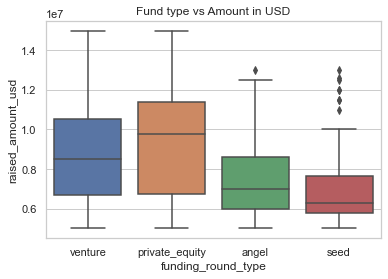

In [453]:
sns.boxplot(x='funding_round_type', y='raised_amount_usd', data=master_frame)
ax.set(xlabel="Fund type", ylabel="Amount in USD")
plt.title("Fund type vs Amount in USD")
plt.show()

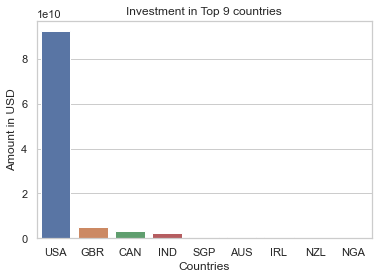

In [454]:
Top_9_countries = master_frame.groupby('country_code').sum('raised_amount_usd') 
ax = sns.barplot(x= Top_9_countries.index,y = 'raised_amount_usd',data = Top_9_countries, order=Top_9_countries.sort_values('raised_amount_usd',ascending = False).index)
ax.set(xlabel="Countries", ylabel="Amount in USD")
plt.title("Investment in Top 9 countries")

plt.show()

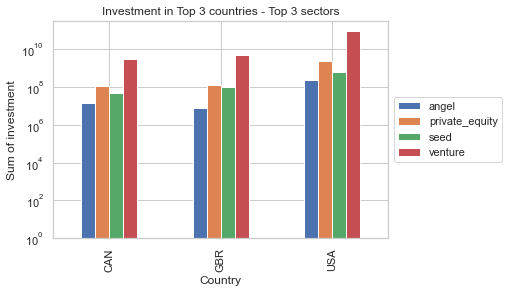

In [505]:
Top3_country = master_frame[master_frame['country_code'].isin(['USA','GBR','CAN'])] 
Top3_country.groupby(['country_code','funding_round_type']).raised_amount_usd.sum().unstack(1).plot.bar(log=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Country')
plt.ylabel('Sum of investment')
plt.title('Investment in Top 3 countries - Top 3 sectors')
plt.show()
#master_frame[master_frame['country_code'].isin(['USA','GBR','CAN'])].groupby(['country_code','funding_round_type']).sum('raised_amount_usd')
